In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TEST_RESULT_CSV = "./test_result.csv"




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/jcjustin/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance
    app.start()
  File "/Users/jcjustin/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in star

AttributeError: _ARRAY_API not found

In [2]:
# Load the CSV file
df = pd.read_csv(TEST_RESULT_CSV)
print(f"Total number of test cases: {len(df)}")
print(f"\nFirst few rows:")
df.head(10)


Total number of test cases: 2000

First few rows:


,Actual,Predicted,Distance
0,rv3io,rv3io,0
1,4pz2t1zb,4pz2t1zb,0
2,2u6t6,246t6,1
3,26pw3,26pw3,0
4,6rn1,6rn1,0
5,3q9kl33x,9q9kl33x,1
6,4d6ddrc,4d6ddrc,0
7,w4yac,w4wk,3
8,z90sk98,z9q8kg8,3
9,ns45,ns45,0


In [13]:
# Count of each distance value
distance_counts = df['Distance'].value_counts().sort_index()
print("Distance Distribution:")
print(distance_counts)
print(f"\nTotal: {distance_counts.sum()}")


Distance Distribution:
Distance
0     633
1     448
2     342
3     234
4     137
5      71
6      46
7      30
8      15
9      10
10     12
11      4
12      2
13      4
14      2
15      2
16      2
17      1
21      1
23      1
25      1
30      2
Name: count, dtype: int64

Total: 2000


In [4]:
# Calculate statistics
total = len(df)
perfect_matches = len(df[df['Distance'] == 0])
accuracy = perfect_matches / total * 100
avg_distance = df['Distance'].mean()
median_distance = df['Distance'].median()
max_distance = df['Distance'].max()

print("Performance Statistics:")
print(f"Total test cases: {total}")
print(f"Perfect matches (Distance = 0): {perfect_matches} ({accuracy:.2f}%)")
print(f"Average distance: {avg_distance:.2f}")
print(f"Median distance: {median_distance:.2f}")
print(f"Maximum distance: {max_distance}")
print(f"Minimum distance: {df['Distance'].min()}")


Performance Statistics:
Total test cases: 2000
Perfect matches (Distance = 0): 633 (31.65%)
Average distance: 1.95
Median distance: 1.00
Maximum distance: 30
Minimum distance: 0


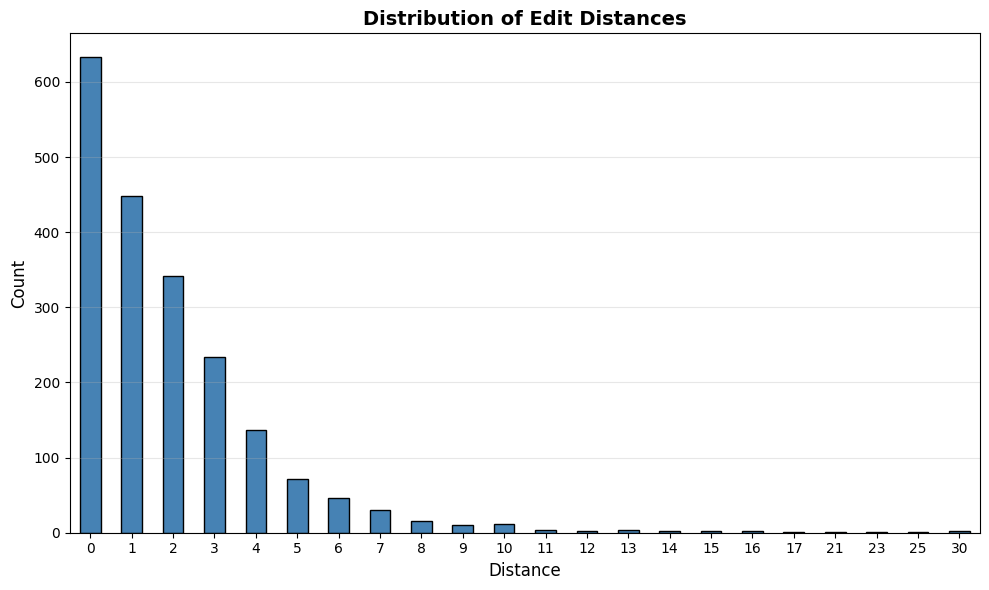

In [5]:
# Visualize distance distribution
plt.figure(figsize=(10, 6))
distance_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Edit Distances', fontsize=14, fontweight='bold')
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [6]:
# Show examples for each distance value
print("Examples for each distance value:\n")
for dist in sorted(df['Distance'].unique()):
    examples = df[df['Distance'] == dist].head(5)
    print(f"Distance = {dist} ({len(df[df['Distance'] == dist])} cases):")
    for idx, row in examples.iterrows():
        print(f"  Actual: {row['Actual']:15s} | Predicted: {row['Predicted']:15s}")
    print()


Examples for each distance value:

Distance = 0 (633 cases):
  Actual: rv3io           | Predicted: rv3io          
  Actual: 4pz2t1zb        | Predicted: 4pz2t1zb       
  Actual: 26pw3           | Predicted: 26pw3          
  Actual: 6rn1            | Predicted: 6rn1           
  Actual: 4d6ddrc         | Predicted: 4d6ddrc        

Distance = 1 (448 cases):
  Actual: 2u6t6           | Predicted: 246t6          
  Actual: 3q9kl33x        | Predicted: 9q9kl33x       
  Actual: fnbe5l          | Predicted: fnbe5          
  Actual: xun9            | Predicted: xbn9           
  Actual: cd7zah          | Predicted: co7zah         

Distance = 2 (342 cases):
  Actual: c1zjhlz         | Predicted: cizjhiz        
  Actual: w1h7h3          | Predicted: wfhxh3         
  Actual: wm23u           | Predicted: wmu            
  Actual: dlu4            | Predicted: dt1u4          
  Actual: frg4r           | Predicted: fn4r           

Distance = 3 (234 cases):
  Actual: w4yac           | Predi

In [7]:
# Additional analysis: Length analysis
df['Actual_Length'] = df['Actual'].str.len()
df['Predicted_Length'] = df['Predicted'].str.len()
df['Length_Diff'] = df['Predicted_Length'] - df['Actual_Length']

print("Length Analysis:")
print(f"Average actual length: {df['Actual_Length'].mean():.2f}")
print(f"Average predicted length: {df['Predicted_Length'].mean():.2f}")
print(f"\nLength difference distribution:")
print(df['Length_Diff'].value_counts().sort_index())


Length Analysis:
Average actual length: 6.00
Average predicted length: 6.41

Length difference distribution:
Length_Diff
-6        1
-5        1
-4        5
-3       15
-2       48
-1      149
 0     1346
 1      201
 2       94
 3       51
 4       31
 5       15
 6       18
 7        7
 8        2
 9        3
 10       4
 11       1
 12       1
 13       2
 16       1
 19       1
 20       1
 25       1
 26       1
Name: count, dtype: int64


Correlation between actual length and distance: 0.152


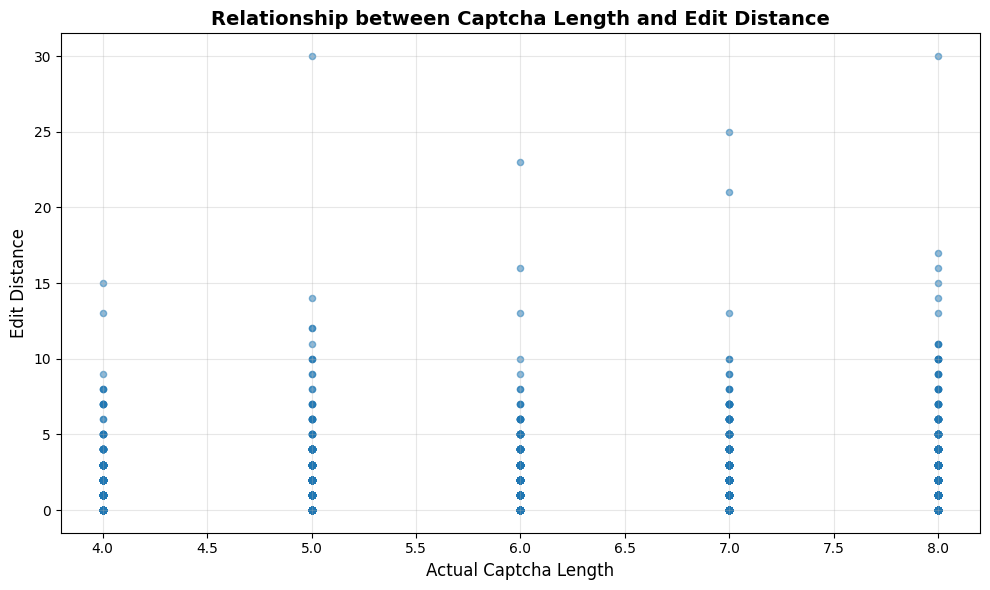

In [12]:
# Correlation between length and distance
correlation = df['Actual_Length'].corr(df['Distance'])
print(f"Correlation between actual length and distance: {correlation:.3f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Actual_Length'], df['Distance'], alpha=0.5, s=20)
plt.xlabel('Actual Captcha Length', fontsize=12)
plt.ylabel('Edit Distance', fontsize=12)
plt.title('Relationship between Captcha Length and Edit Distance', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
# Calculate comprehensive model scores
from difflib import SequenceMatcher

def calculate_character_accuracy(actual, predicted):
    """Calculate character-level accuracy using longest common subsequence"""
    if len(actual) == 0 and len(predicted) == 0:
        return 1.0
    if len(actual) == 0 or len(predicted) == 0:
        return 0.0
    
    # Use SequenceMatcher to find matching characters
    matcher = SequenceMatcher(None, actual, predicted)
    matches = sum(block.size for block in matcher.get_matching_blocks())
    max_len = max(len(actual), len(predicted))
    return matches / max_len if max_len > 0 else 0.0

# Calculate metrics
total = len(df)

# 1. Exact Match Accuracy (String-level accuracy)
exact_matches = len(df[df['Distance'] == 0])
exact_match_accuracy = exact_matches / total

# 2. Character-level Accuracy
char_accuracies = []
for idx, row in df.iterrows():
    char_acc = calculate_character_accuracy(row['Actual'], row['Predicted'])
    char_accuracies.append(char_acc)
df['Char_Accuracy'] = char_accuracies
character_accuracy = np.mean(char_accuracies)

# 3. Normalized Edit Distance (accounts for string length)
df['Max_Length'] = df[['Actual_Length', 'Predicted_Length']].max(axis=1)
df['Normalized_Distance'] = df['Distance'] / df['Max_Length'].replace(0, 1)  # Avoid division by zero
normalized_avg_distance = df['Normalized_Distance'].mean()

# 4. Levenshtein Similarity Score (1 - normalized distance)
df['Similarity_Score'] = 1 - df['Normalized_Distance']
avg_similarity = df['Similarity_Score'].mean()

# 5. Accuracy within tolerance (distance <= 1, 2, 3)
accuracy_within_1 = len(df[df['Distance'] <= 1]) / total
accuracy_within_2 = len(df[df['Distance'] <= 2]) / total
accuracy_within_3 = len(df[df['Distance'] <= 3]) / total

# Print comprehensive scores
print("=" * 60)
print("COMPREHENSIVE MODEL SCORES")
print("=" * 60)
print(f"\n1. EXACT MATCH ACCURACY (String-level):")
print(f"   {exact_match_accuracy:.4f} ({exact_match_accuracy*100:.2f}%)")
print(f"   Perfect predictions: {exact_matches}/{total}")

print(f"\n2. CHARACTER-LEVEL ACCURACY:")
print(f"   {character_accuracy:.4f} ({character_accuracy*100:.2f}%)")
print(f"   Average character match rate across all predictions")

print(f"\n3. NORMALIZED EDIT DISTANCE:")
print(f"   {normalized_avg_distance:.4f}")
print(f"   Average edit distance normalized by string length")

print(f"\n4. LEVENSHTEIN SIMILARITY SCORE:")
print(f"   {avg_similarity:.4f} ({avg_similarity*100:.2f}%)")
print(f"   Average similarity: 1.0 = perfect match, 0.0 = completely different")

print(f"\n5. ACCURACY WITHIN TOLERANCE:")
print(f"   Distance ≤ 1: {accuracy_within_1:.4f} ({accuracy_within_1*100:.2f}%)")
print(f"   Distance ≤ 2: {accuracy_within_2:.4f} ({accuracy_within_2*100:.2f}%)")
print(f"   Distance ≤ 3: {accuracy_within_3:.4f} ({accuracy_within_3*100:.2f}%)")

print(f"\n6. RAW STATISTICS:")
print(f"   Average edit distance: {df['Distance'].mean():.2f}")
print(f"   Median edit distance: {df['Distance'].median():.2f}")
print(f"   Standard deviation: {df['Distance'].std():.2f}")

print("\n" + "=" * 60)
print("RECOMMENDED PRIMARY SCORE:")
print("=" * 60)
print(f"Character-Level Accuracy: {character_accuracy:.4f} ({character_accuracy*100:.2f}%)")
print("\n(This metric accounts for partial matches and is most")
print(" appropriate for character-by-character prediction tasks)")
print("=" * 60)

COMPREHENSIVE MODEL SCORES

1. EXACT MATCH ACCURACY (String-level):
   0.3165 (31.65%)
   Perfect predictions: 633/2000

2. CHARACTER-LEVEL ACCURACY:
   0.7336 (73.36%)
   Average character match rate across all predictions

3. NORMALIZED EDIT DISTANCE:
   0.2684
   Average edit distance normalized by string length

4. LEVENSHTEIN SIMILARITY SCORE:
   0.7316 (73.16%)
   Average similarity: 1.0 = perfect match, 0.0 = completely different

5. ACCURACY WITHIN TOLERANCE:
   Distance ≤ 1: 0.5405 (54.05%)
   Distance ≤ 2: 0.7115 (71.15%)
   Distance ≤ 3: 0.8285 (82.85%)

6. RAW STATISTICS:
   Average edit distance: 1.95
   Median edit distance: 1.00
   Standard deviation: 2.53

RECOMMENDED PRIMARY SCORE:
Character-Level Accuracy: 0.7336 (73.36%)

(This metric accounts for partial matches and is most
 appropriate for character-by-character prediction tasks)


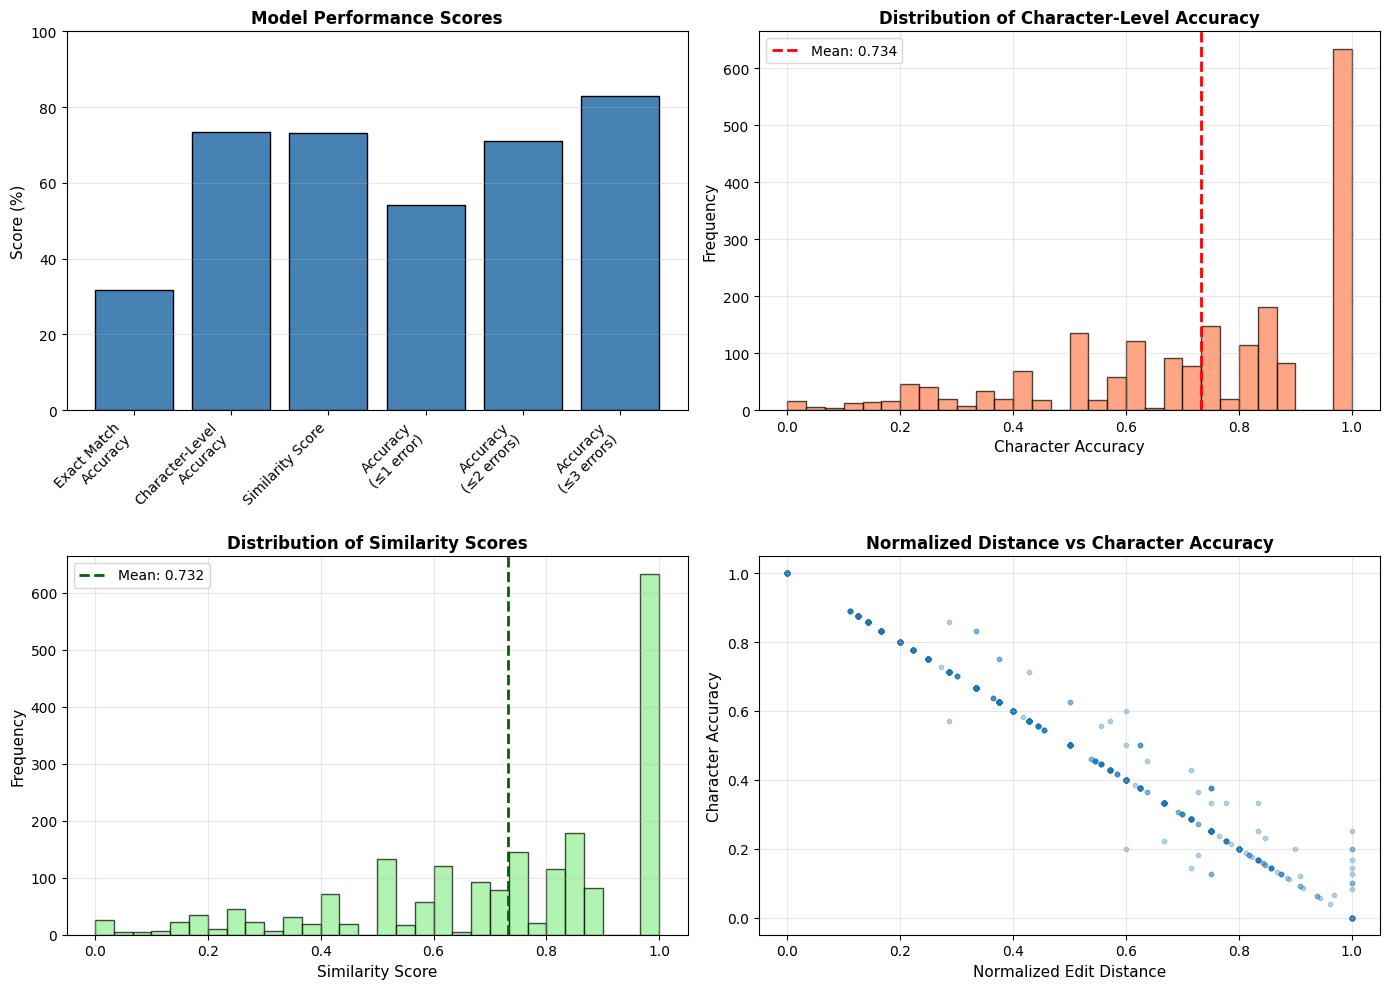

In [11]:
# Visualize the scores
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Score comparison bar chart
scores = {
    'Exact Match\nAccuracy': exact_match_accuracy * 100,
    'Character-Level\nAccuracy': character_accuracy * 100,
    'Similarity Score': avg_similarity * 100,
    'Accuracy\n(≤1 error)': accuracy_within_1 * 100,
    'Accuracy\n(≤2 errors)': accuracy_within_2 * 100,
    'Accuracy\n(≤3 errors)': accuracy_within_3 * 100
}
axes[0, 0].bar(range(len(scores)), list(scores.values()), color='steelblue', edgecolor='black')
axes[0, 0].set_xticks(range(len(scores)))
axes[0, 0].set_xticklabels(list(scores.keys()), rotation=45, ha='right')
axes[0, 0].set_ylabel('Score (%)', fontsize=11)
axes[0, 0].set_title('Model Performance Scores', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylim([0, 100])

# 2. Character accuracy distribution
axes[0, 1].hist(df['Char_Accuracy'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(character_accuracy, color='red', linestyle='--', linewidth=2, label=f'Mean: {character_accuracy:.3f}')
axes[0, 1].set_xlabel('Character Accuracy', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Character-Level Accuracy', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Similarity score distribution
axes[1, 0].hist(df['Similarity_Score'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(avg_similarity, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {avg_similarity:.3f}')
axes[1, 0].set_xlabel('Similarity Score', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Similarity Scores', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Normalized distance vs Character accuracy scatter
axes[1, 1].scatter(df['Normalized_Distance'], df['Char_Accuracy'], alpha=0.3, s=10)
axes[1, 1].set_xlabel('Normalized Edit Distance', fontsize=11)
axes[1, 1].set_ylabel('Character Accuracy', fontsize=11)
axes[1, 1].set_title('Normalized Distance vs Character Accuracy', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
